In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

In [2]:
df = pd.read_csv(
    "./data/data_reduced_all.csv",
    usecols={
        "dateid",
        "platform",
        "gamemode",
        "mapname",
        "matchid",
        "roundnumber",
        "objectivelocation",
        "winrole",
        "endroundreason",
        "roundduration",
        "clearancelevel",
        "skillrank",
        "role",
        "team",
        "haswon",
        "operator",
        "nbkills",
        "isdead"
    },
    dtype={
        # "dateid": "int64",
        "platform": "category",
        "gamemode": "category",
        "mapname": "category",
        "matchid": "int64",
        "roundnumber": "int64",
        "objectivelocation": "category",
        "winrole": "category",
        "endroundreason": "category",
        "roundduration": "int64",
        "clearancelevel": "int64",
        "skillrank": "category",
        "role": "category",
        "team": "int64",
        "haswon": "boolean",
        "operator": "category",
        "nbkills": "int64",
        "isdead": "boolean"
    },
    parse_dates=["dateid"]
)

In [3]:
df["skillrank"] = df["skillrank"].cat.reorder_categories(["Unranked", "Copper", "Bronze", "Silver", "Gold", "Platinum", "Diamond"])
df["skillrank"].dtype

CategoricalDtype(categories=['Unranked', 'Copper', 'Bronze', 'Silver', 'Gold', 'Platinum',
                  'Diamond'],
, ordered=False)

In [4]:
df.groupby("skillrank")["roundduration"].median()

skillrank
Unranked    189.0
Copper      177.0
Bronze      182.0
Silver      186.0
Gold        191.0
Platinum    196.0
Diamond     196.0
Name: roundduration, dtype: float64

In [5]:
df_plot = df.groupby("skillrank")["roundduration"].median().reset_index(name="median_roundduration")
df_plot

,skillrank,median_roundduration
0,Unranked,189.0
1,Copper,177.0
2,Bronze,182.0
3,Silver,186.0
4,Gold,191.0
5,Platinum,196.0
6,Diamond,196.0


<AxesSubplot:xlabel='skillrank', ylabel='median_roundduration'>

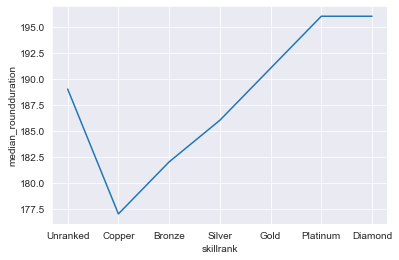

In [6]:
sns.lineplot(data=df_plot, x="skillrank", y="median_roundduration")

In [8]:
df["roundduration_corrected"] = df["roundduration"] - 30
df["roundduration_corrected"].describe()

count    2.139362e+07
mean     1.558185e+02
std      4.385170e+01
min     -2.500000e+01
25%      1.260000e+02
50%      1.580000e+02
75%      1.910000e+02
max      1.273900e+04
Name: roundduration_corrected, dtype: float64

In [23]:
df_plot = df.loc[(df["roundduration_corrected"] < 181) & (df["roundduration_corrected"] >= 0)].groupby("skillrank")["roundduration"].median().reset_index(name="median_roundduration")
df_plot

,median,std
skillrank,,
Unranked,167.0,29.074697
Copper,162.0,29.523357
Bronze,164.0,29.202738
Silver,166.0,28.972008
Gold,168.0,28.877616
Platinum,171.0,28.683216
Diamond,171.0,28.859477


<AxesSubplot:xlabel='skillrank', ylabel='median_roundduration'>

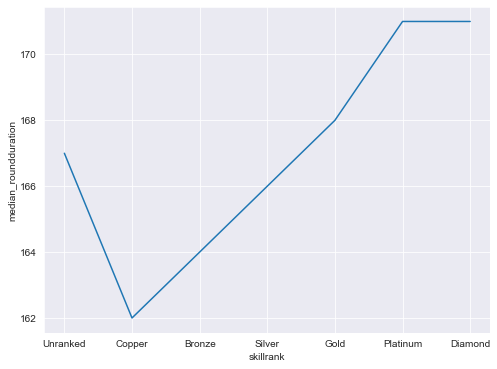

In [21]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_plot, x="skillrank", y="median_roundduration", markers=True)

<AxesSubplot:xlabel='skillrank', ylabel='roundduration'>

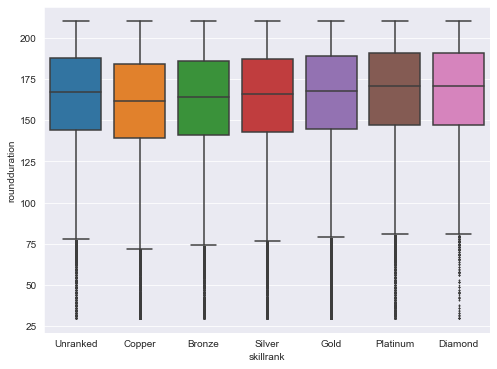

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.loc[(df["roundduration_corrected"] < 181) & (df["roundduration_corrected"] >= 0)], x="skillrank", y="roundduration", fliersize=.8)

In [7]:
df.groupby("skillrank")["roundduration"].describe()

,count,mean,std,min,25%,50%,75%,max
skillrank,,,,,,,,
Unranked,1503812.0,186.324297,45.094673,6.0,156.0,189.0,222.0,9049.0
Copper,2451461.0,178.072310,45.860490,6.0,147.0,177.0,212.0,7530.0
Bronze,2445194.0,181.829197,44.922802,6.0,151.0,182.0,217.0,11658.0
Silver,3759306.0,184.428596,43.560907,6.0,154.0,186.0,220.0,9189.0
Gold,7481334.0,187.723968,43.119486,5.0,158.0,191.0,222.0,12769.0
Platinum,3394849.0,190.908687,42.028789,6.0,163.0,196.0,224.0,6886.0
Diamond,357664.0,190.497609,42.104959,6.0,163.0,196.0,223.0,4338.0


In [17]:
df.groupby("skillrank")["endroundreason"].value_counts(normalize=True)

skillrank                         
Unranked   DefendersEliminated        0.478453
           AttackersEliminated        0.360053
           BombExploded               0.076323
           DefuserDeactivated         0.060073
           BombDeactivated_OneBomb    0.021023
                                        ...   
Diamond    BombDeactivated_OneBomb    0.013876
           AttackersSurrendered       0.001982
           DefendersSurrendered       0.001406
           AllTeamsDead               0.000993
           NoEnemies                  0.000011
Name: endroundreason, Length: 63, dtype: float64

In [18]:
df.groupby("skillrank")["nbkills"].mean()

skillrank
Unranked    0.581061
Copper      0.645451
Bronze      0.669406
Silver      0.689127
Gold        0.729612
Platinum    0.785122
Diamond     0.875126
Name: nbkills, dtype: float64

In [19]:
df.groupby("skillrank")["isdead"].value_counts(normalize=True)

skillrank  isdead
Unranked   True      0.735832
           False     0.264168
Copper     True      0.720831
           False     0.279169
Bronze     True      0.711773
           False     0.288227
Silver     True      0.711689
           False     0.288311
Gold       True      0.706167
           False     0.293833
Platinum   True      0.702191
           False     0.297809
Diamond    True      0.669120
           False     0.330880
Name: isdead, dtype: float64